In [1]:
# %pip install CoolProp
# %pip install seaborn
# %pip install openpyxl

In [2]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import seaborn
import pickle

import DiadFit as pf
pf.__version__


'1.0.5'

In [3]:


# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

In [4]:

if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.getcwd()

# rep_FI_path=os.path.join(Helperfile_folder, "Leilani_repeated_names.xlsx") #r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Helper_files\Leilaini_repeated_names.xlsx"

#Folder to save figures

figpath=MasterFolder +slash+'Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

#Folder to save full datasets

compilation_folder=MasterFolder +slash+'Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

In [5]:
## This function compiles raman sessions found in the master folder (even in subdirectories of the specified folder)
def compile_Raman_sessions(*, path=None, sheet_name='Sheet1', keyword='Raman_session'):
    df = pd.DataFrame()

    for root, dirs, files in os.walk(path):
        for file in files:
            if keyword in file and file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                sheets = pd.read_excel(file_path, sheet_name)
                df = pd.concat([df, sheets], axis=0, ignore_index=True)
                unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
                df = df.drop(columns=unnamed_columns)

    return df

In [6]:
kamaehu = compile_Raman_sessions(path=MasterFolder,sheet_name='Sheet1',keyword='Raman')

kamaehu = kamaehu[(~kamaehu['filename'].str.contains('test'))&(kamaehu['Density g/cm3']>0)&~(kamaehu['accumulations']<3)]

kamaehu['date_object']=pd.to_datetime(kamaehu['date'])

kamaehu=kamaehu.sort_values(by=['date_object', 'filename'])

kamaehu.to_clipboard(excel=True, index=False)

kamaehu.to_excel(compilation_folder+'/'+"Kam_MI.xlsx")

kamaehu

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,lower_values,upper_values,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name_x,Model_name_y,SO2_Diad_Ratio,SO2_mol_ratio,date_object
7,187-1-201-FI2,0.583108,0.006781,0.006355,0.002367,104.110746,0.013161,0.000823,0.013162,6.019,...,0.997940,0.997956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-25
8,187-1-201-FI3,0.544243,0.007259,0.006864,0.002361,104.029477,0.014490,0.000821,0.014496,6.018,...,0.997940,0.997955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-25
9,187-1-201-FI4,0.600401,0.005654,0.005133,0.002371,104.146410,0.010540,0.000821,0.010530,6.018,...,0.997939,0.997955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-25
10,187-1-201-FI5,0.582904,0.005578,0.005050,0.002367,104.110325,0.010461,0.000819,0.010450,6.012,...,0.997939,0.997954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-25
4,187-1-201-MI1-rep1,0.093134,0.012689,0.012106,0.003802,102.985300,0.030551,0.000821,0.030603,11.953,...,0.997942,0.997958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,187-9-220-MIB-edgecarb,0.076298,0.004055,0.001403,0.003804,102.942811,0.003542,0.002082,0.002871,10.034,...,0.997877,0.997918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-30
248,187-9-220-MIB-rep2,0.080406,0.004074,0.001464,0.003802,102.953177,0.003694,0.002074,0.003063,10.025,...,0.997876,0.997916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-30
249,187-9-220-MIB-rep3,0.079046,0.004049,0.001391,0.003803,102.949747,0.003511,0.002071,0.002841,10.041,...,0.997875,0.997916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-30
273,FG04-A1-4-end,0.692735,0.003381,0.002391,0.002391,104.331702,0.004687,0.002329,0.004076,6.019,...,0.997845,0.997889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-30


In [25]:
rep_FI_names=pd.read_excel('Helper_file.xlsx')
kamaehu_reps=pd.merge(kamaehu,rep_FI_names, on='filename')
kamaehu_reps

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Model_name_y,SO2_Diad_Ratio,SO2_mol_ratio,date_object_x,FI_name,Sample-Crystal,Sample,Crystal,FI#,date_object_y
0,187-1-201-FI2,0.583108,0.006781,0.006355,0.002367,104.110746,0.013161,0.000823,0.013162,6.019,...,NaN,NaN,NaN,2024-04-25,187-1-201-FI2,187-1-201,187-1,201,FI2,45407
1,187-1-201-FI3,0.544243,0.007259,0.006864,0.002361,104.029477,0.014490,0.000821,0.014496,6.018,...,NaN,NaN,NaN,2024-04-25,187-1-201-FI3,187-1-201,187-1,201,FI3,45407
2,187-1-201-FI4,0.600401,0.005654,0.005133,0.002371,104.146410,0.010540,0.000821,0.010530,6.018,...,NaN,NaN,NaN,2024-04-25,187-1-201-FI4,187-1-201,187-1,201,FI4,45407
3,187-1-201-FI5,0.582904,0.005578,0.005050,0.002367,104.110325,0.010461,0.000819,0.010450,6.012,...,NaN,NaN,NaN,2024-04-25,187-1-201-FI5,187-1-201,187-1,201,FI5,45407
4,187-1-201-MI1-rep1,0.093134,0.012689,0.012106,0.003802,102.985300,0.030551,0.000821,0.030603,11.953,...,NaN,NaN,NaN,2024-04-25,187-1-201-MI1,187-1-201,187-1,201,MI1,45407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,186-11-218-MIB-rep2,0.155972,0.007796,0.006739,0.003919,103.143887,0.017007,0.002256,0.016892,10.053,...,NaN,NaN,NaN,2024-08-30,186-11-218-MIB,186-11-218,186-11,218,MIB,45534
310,186-11-218-MIB-rep3,0.140750,0.007706,0.006662,0.003873,103.105469,0.016813,0.002277,0.016694,9.958,...,NaN,NaN,NaN,2024-08-30,186-11-218-MIB,186-11-218,186-11,218,MIB,45534
311,187-9-220-MIB-edgecarb,0.076298,0.004055,0.001403,0.003804,102.942811,0.003542,0.002082,0.002871,10.034,...,NaN,NaN,NaN,2024-08-30,187-9-220-MIB,187-9-220,187-9,220,MIB,45534
312,187-9-220-MIB-rep2,0.080406,0.004074,0.001464,0.003802,102.953177,0.003694,0.002074,0.003063,10.025,...,NaN,NaN,NaN,2024-08-30,187-9-220-MIB,187-9-220,187-9,220,MIB,45534


In [26]:
grouped = kamaehu_reps.groupby('FI_name')

# Separate numeric and non-numeric columns
numeric_cols = kamaehu_reps.select_dtypes(include='number')
non_numeric_cols = kamaehu_reps.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_kamaehu_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_kamaehu_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_kamaehu_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate kamaehu_averageds and reindex columns to the original order
kamaehu_averaged = pd.concat([numeric_kamaehu_averaged_mean, non_numeric_kamaehu_averaged], axis=1)
kamaehu_averaged = kamaehu_averaged.reindex(columns=kamaehu_reps.columns)

# Add standard deviation columns after reindexing
kamaehu_averaged = pd.concat([kamaehu_averaged, numeric_kamaehu_averaged_std.add_suffix('_std')], axis=1)

# Reset index to get a DataFrame
kamaehu_averaged = kamaehu_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
kamaehu_averaged = pd.merge(kamaehu_averaged, row_counts[['FI_name', 'averaged?']], on='FI_name', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
kamaehu_averaged['averaged?']=kamaehu_averaged['averaged?'].fillna('No')

#exclude a weird null average spectrum
kamaehu_averaged=kamaehu_averaged[~(kamaehu_averaged['filename'].str.contains("186-9-118-A"))]
kamaehu_averaged.to_excel(compilation_folder+'/'+"Kamae'huakanaloa_averaged.xlsx")

kamaehu_averaged


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,preferred_values_std,lower_values_std,upper_values_std,Peak_Cent_SO2_std,Peak_Area_SO2_std,Peak_Height_SO2_std,SO2_Diad_Ratio_std,SO2_mol_ratio_std,date_object_y_std,averaged?
0,186-11-201-MIA-rep1,0.143828,0.006759,0.005516,0.003883,103.113236,0.013920,0.001151,0.013900,12.013250,...,1.903782e-06,1.859439e-06,1.948128e-06,NaN,NaN,NaN,NaN,NaN,0.0,Yes
1,186-11-202-MIA-rep1,0.012467,0.006641,0.005341,0.003944,102.781718,0.013480,0.001141,0.013459,12.014000,...,4.782441e-07,4.838302e-07,4.726579e-07,NaN,NaN,NaN,NaN,NaN,0.0,Yes
2,186-11-203-MIA-rep1,0.018748,0.007723,0.006630,0.003922,102.797570,0.016731,0.001158,0.016725,12.018000,...,1.203168e-06,1.244686e-06,1.161651e-06,NaN,NaN,NaN,NaN,NaN,0.0,Yes
3,186-11-203-MIB-rep1,0.011673,0.007474,0.006340,0.003948,102.779715,0.016001,0.001176,0.015991,12.047333,...,1.620197e-06,1.698584e-06,1.541814e-06,NaN,NaN,NaN,NaN,NaN,0.0,Yes
4,186-11-204-MIA-rep1,0.123203,0.005056,0.003282,0.003833,103.061186,0.008284,0.001236,0.008207,11.943333,...,9.766462e-07,1.049089e-06,9.042040e-07,NaN,NaN,NaN,NaN,NaN,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,FG04-A1-4-start,0.694860,0.004299,0.003461,0.002392,104.335852,0.006782,0.001030,0.006699,6.032333,...,1.980642e-05,2.482127e-05,1.559597e-05,NaN,NaN,NaN,NaN,NaN,0.0,Yes
134,FG04-A1-4-start,0.694860,0.004299,0.003461,0.002392,104.335852,0.006782,0.001030,0.006699,6.032333,...,1.980642e-05,2.482127e-05,1.559597e-05,NaN,NaN,NaN,NaN,NaN,0.0,Yes
135,FG04-A1-4-start,0.694860,0.004299,0.003461,0.002392,104.335852,0.006782,0.001030,0.006699,6.032333,...,1.980642e-05,2.482127e-05,1.559597e-05,NaN,NaN,NaN,NaN,NaN,0.0,Yes
136,FG19-101-A-50X-rep4,0.953458,0.004043,0.003715,0.001593,105.016439,0.012030,0.000888,0.012022,6.003667,...,3.256548e-07,3.512970e-07,3.000127e-07,NaN,NaN,NaN,NaN,NaN,0.0,Yes


In [27]:
kamaehu_averaged[kamaehu_averaged['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,preferred_values_std,lower_values_std,upper_values_std,Peak_Cent_SO2_std,Peak_Area_SO2_std,Peak_Height_SO2_std,SO2_Diad_Ratio_std,SO2_mol_ratio_std,date_object_y_std,averaged?
0,186-11-201-MIA-rep1,0.143828,0.006759,0.005516,0.003883,103.113236,0.013920,0.001151,0.013900,12.013250,...,1.903782e-06,1.859439e-06,1.948128e-06,NaN,NaN,NaN,NaN,NaN,0.000000,Yes
1,186-11-202-MIA-rep1,0.012467,0.006641,0.005341,0.003944,102.781718,0.013480,0.001141,0.013459,12.014000,...,4.782441e-07,4.838302e-07,4.726579e-07,NaN,NaN,NaN,NaN,NaN,0.000000,Yes
2,186-11-203-MIA-rep1,0.018748,0.007723,0.006630,0.003922,102.797570,0.016731,0.001158,0.016725,12.018000,...,1.203168e-06,1.244686e-06,1.161651e-06,NaN,NaN,NaN,NaN,NaN,0.000000,Yes
3,186-11-203-MIB-rep1,0.011673,0.007474,0.006340,0.003948,102.779715,0.016001,0.001176,0.015991,12.047333,...,1.620197e-06,1.698584e-06,1.541814e-06,NaN,NaN,NaN,NaN,NaN,0.000000,Yes
4,186-11-204-MIA-rep1,0.123203,0.005056,0.003282,0.003833,103.061186,0.008284,0.001236,0.008207,11.943333,...,9.766462e-07,1.049089e-06,9.042040e-07,NaN,NaN,NaN,NaN,NaN,0.000000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,187-9-219-MIA-rep1,0.027943,0.020579,0.020169,0.003896,102.820775,0.050900,0.000737,0.051000,11.952000,...,1.019529e-05,1.026354e-05,1.012703e-05,NaN,NaN,NaN,NaN,NaN,1.154701,Yes
109,187-9-220-MIA,0.091316,0.003984,0.001192,0.003801,102.980712,0.003008,0.000763,0.002916,11.953000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
110,187-9-220-MIB-edgecarb,0.078583,0.004059,0.001419,0.003803,102.948578,0.003582,0.002076,0.002925,10.033333,...,1.003510e-06,9.493066e-07,1.057719e-06,NaN,NaN,NaN,NaN,NaN,0.000000,Yes
113,187-9-221-MIA-rep1,0.024362,0.006615,0.005139,0.003903,102.811738,0.012970,0.000714,0.012973,11.874667,...,4.617470e-07,4.252566e-07,4.982412e-07,NaN,NaN,NaN,NaN,NaN,0.000000,Yes


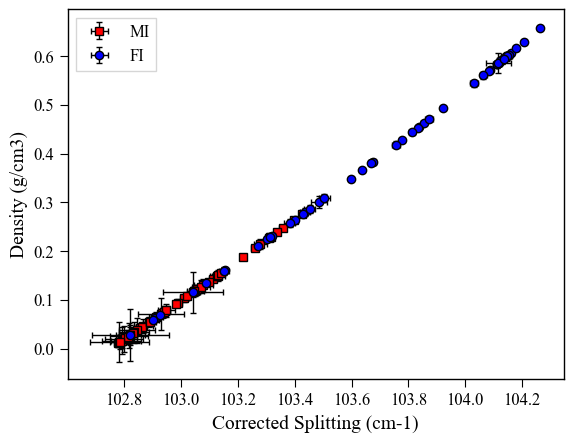

In [28]:
MI=kamaehu_averaged['filename'].str.contains("MI")
FI=kamaehu_averaged['filename'].str.contains("FI")
stds=kamaehu_averaged['filename'].str.contains("FG")

plt.errorbar(kamaehu_averaged[MI]['Corrected_Splitting'],kamaehu_averaged[MI]['Density g/cm3'],xerr=kamaehu_averaged[MI]['Corrected_Splitting_σ'],yerr=kamaehu_averaged[MI]['σ Density g/cm3'],
             fmt='s',color='red',ecolor='k',capsize=2,elinewidth=1,label='MI',mec='k')
plt.errorbar(kamaehu_averaged[FI]['Corrected_Splitting'],kamaehu_averaged[FI]['Density g/cm3'],xerr=kamaehu_averaged[FI]['Corrected_Splitting_σ'],yerr=kamaehu_averaged[FI]['σ Density g/cm3'],
             fmt='o',color='blue',ecolor='k',capsize=2,elinewidth=1,label='FI',mec='k')
plt.xlabel("Corrected Splitting (cm-1)")
plt.ylabel("Density (g/cm3)")
plt.legend()

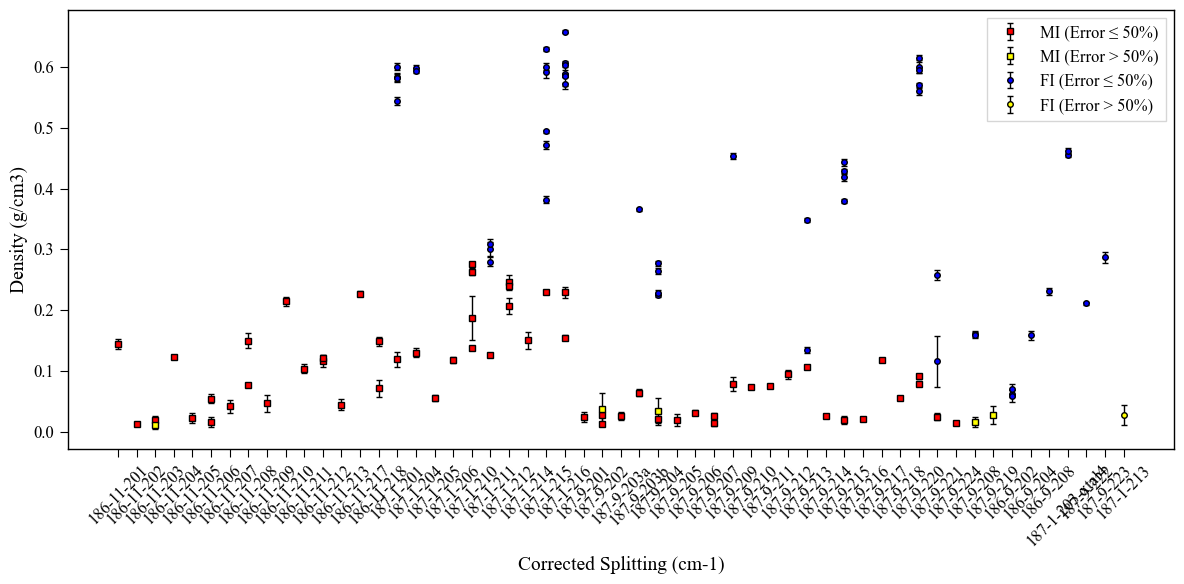

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the error threshold
error_threshold = 50  # Set your threshold percentage here

# Calculate percentage error
kamaehu_averaged['Error (%)'] = (kamaehu_averaged['σ Density g/cm3'] / kamaehu_averaged['Density g/cm3']) * 100

# Calculate percentage error using 'Density g/cm3_std' for rows with 'averaged?' == 'Yes'
condition = kamaehu_averaged['averaged?'] == 'Yes'
kamaehu_averaged.loc[condition, 'Error (std) (%)'] = (kamaehu_averaged.loc[condition, 'Density g/cm3_std'] / kamaehu_averaged.loc[condition, 'Density g/cm3']) * 100

# Create a figure and axis with a specified size
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figsize to make the plot longer

# Boolean masks for different sample types
MI = kamaehu_averaged['filename'].str.contains("MI")
FI = kamaehu_averaged['filename'].str.contains("FI")

# Define the errors and labels for MI
mi_errors = kamaehu_averaged.loc[MI, 'σ Density g/cm3'].where(kamaehu_averaged['averaged?'] != 'Yes', kamaehu_averaged.loc[MI, 'Density g/cm3_std'])
mi_yerrs = kamaehu_averaged.loc[MI, 'σ Density g/cm3'].where(kamaehu_averaged['averaged?'] != 'Yes', kamaehu_averaged.loc[MI, 'Density g/cm3_std'])
mi_high_error = kamaehu_averaged.loc[MI, 'Error (%)'].where(kamaehu_averaged['averaged?'] != 'Yes', kamaehu_averaged.loc[MI, 'Error (std) (%)']) > error_threshold

# Plot MI data with appropriate errors
ax.errorbar(kamaehu_averaged.loc[MI & ~mi_high_error, 'Sample-Crystal'],
            kamaehu_averaged.loc[MI & ~mi_high_error, 'Density g/cm3'],
            yerr=mi_errors[~mi_high_error],
            fmt='s', color='red', ecolor='k', capsize=2, markersize=4, elinewidth=1, 
            label=f'MI (Error ≤ {error_threshold}%)', mec='k')

ax.errorbar(kamaehu_averaged.loc[MI & mi_high_error, 'Sample-Crystal'],
            kamaehu_averaged.loc[MI & mi_high_error, 'Density g/cm3'],
            yerr=mi_errors[mi_high_error],
            fmt='s', color='yellow', ecolor='k', capsize=2, markersize=4, elinewidth=1, 
            label=f'MI (Error > {error_threshold}%)', mec='k')

# Define the errors and labels for FI
fi_errors = kamaehu_averaged.loc[FI, 'σ Density g/cm3'].where(kamaehu_averaged['averaged?'] != 'Yes', kamaehu_averaged.loc[FI, 'Density g/cm3_std'])
fi_yerrs = kamaehu_averaged.loc[FI, 'σ Density g/cm3'].where(kamaehu_averaged['averaged?'] != 'Yes', kamaehu_averaged.loc[FI, 'Density g/cm3_std'])
fi_high_error = kamaehu_averaged.loc[FI, 'Error (%)'].where(kamaehu_averaged['averaged?'] != 'Yes', kamaehu_averaged.loc[FI, 'Error (std) (%)']) > error_threshold

# Plot FI data with appropriate errors
ax.errorbar(kamaehu_averaged.loc[FI & ~fi_high_error, 'Sample-Crystal'],
            kamaehu_averaged.loc[FI & ~fi_high_error, 'Density g/cm3'],
            yerr=fi_errors[~fi_high_error],
            fmt='o', color='blue', ecolor='k', markersize=4, capsize=2, elinewidth=1, 
            label=f'FI (Error ≤ {error_threshold}%)', mec='k')

ax.errorbar(kamaehu_averaged.loc[FI & fi_high_error, 'Sample-Crystal'],
            kamaehu_averaged.loc[FI & fi_high_error, 'Density g/cm3'],
            yerr=fi_errors[fi_high_error],
            fmt='o', color='yellow', ecolor='k', markersize=4, capsize=2, elinewidth=1, 
            label=f'FI (Error > {error_threshold}%)', mec='k')

# Set labels and title
ax.set_xlabel("Corrected Splitting (cm-1)")
ax.set_ylabel("Density (g/cm3)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [30]:
kamaehu_averaged[kamaehu_averaged['filename'].str.contains("9-205")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,upper_values_std,Peak_Cent_SO2_std,Peak_Area_SO2_std,Peak_Height_SO2_std,SO2_Diad_Ratio_std,SO2_mol_ratio_std,date_object_y_std,averaged?,Error (%),Error (std) (%)
79,187-9-205-MIA-20mw,0.019647,0.02631,0.026001,0.00392,102.799839,0.06562,0.000622,0.065752,14.656667,...,5.505315e-07,NaN,NaN,NaN,NaN,NaN,0.0,Yes,133.913362,49.782715


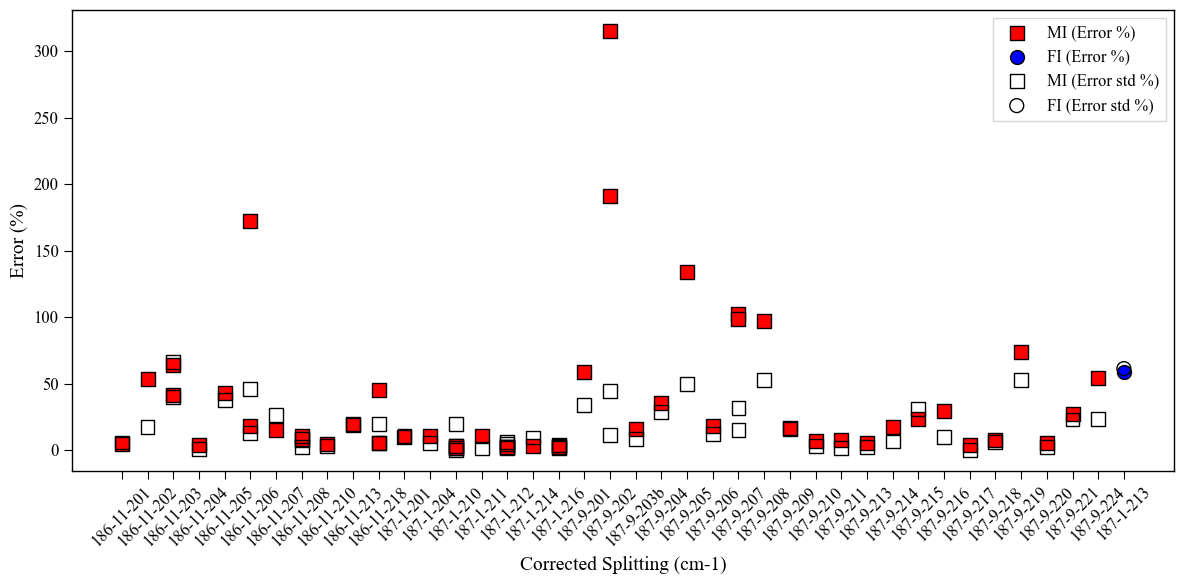

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the error threshold
error_threshold = 30  # Set your threshold percentage here

# Filter the DataFrame to include only rows where 'averaged?' is 'Yes'
kamaehu_filtered = kamaehu_averaged[kamaehu_averaged['averaged?'] == 'Yes'].copy()

# Calculate percentage error
kamaehu_filtered['Error (%)'] = (kamaehu_filtered['σ Density g/cm3'] / kamaehu_filtered['Density g/cm3']) * 100

# Calculate percentage error using 'Density g/cm3_std'
kamaehu_filtered['Error (std) (%)'] = (kamaehu_filtered['Density g/cm3_std'] / kamaehu_filtered['Density g/cm3']) * 100

# Create a figure and axis with a specified size
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figsize to make the plot longer

# Boolean masks for different sample types
MI = kamaehu_filtered['filename'].str.contains("MI")
FI = kamaehu_filtered['filename'].str.contains("FI")

# Plot MI data with Error (%)
if not kamaehu_filtered[MI].empty:
    ax.scatter(kamaehu_filtered[MI]['Sample-Crystal'],
               kamaehu_filtered[MI]['Error (%)'],
               color='red', marker='s', s=100, 
               label='MI (Error %)', edgecolor='k')

# Plot FI data with Error (%)
if not kamaehu_filtered[FI].empty:
    ax.scatter(kamaehu_filtered[FI]['Sample-Crystal'],
               kamaehu_filtered[FI]['Error (%)'],
               color='blue', marker='o', s=100, 
               label='FI (Error %)', edgecolor='k')

# Plot MI data with Error (std) (%) using empty markers
if not kamaehu_filtered[MI].empty:
    ax.scatter(kamaehu_filtered[MI]['Sample-Crystal'],
               kamaehu_filtered[MI]['Error (std) (%)'],
               color='red', marker='s', s=100, facecolors='none', 
               label='MI (Error std %)', edgecolor='k')

# Plot FI data with Error (std) (%) using empty markers
if not kamaehu_filtered[FI].empty:
    ax.scatter(kamaehu_filtered[FI]['Sample-Crystal'],
               kamaehu_filtered[FI]['Error (std) (%)'],
               color='blue', marker='o', s=100, facecolors='none', 
               label='FI (Error std %)', edgecolor='k')

# Set labels and title
ax.set_xlabel("Corrected Splitting (cm-1)")
ax.set_ylabel("Error (%)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend if any data was plotted
if ax.get_legend_handles_labels()[0]:  # Check if any labels were added
    ax.legend()

# Show plot
plt.tight_layout()
plt.show()


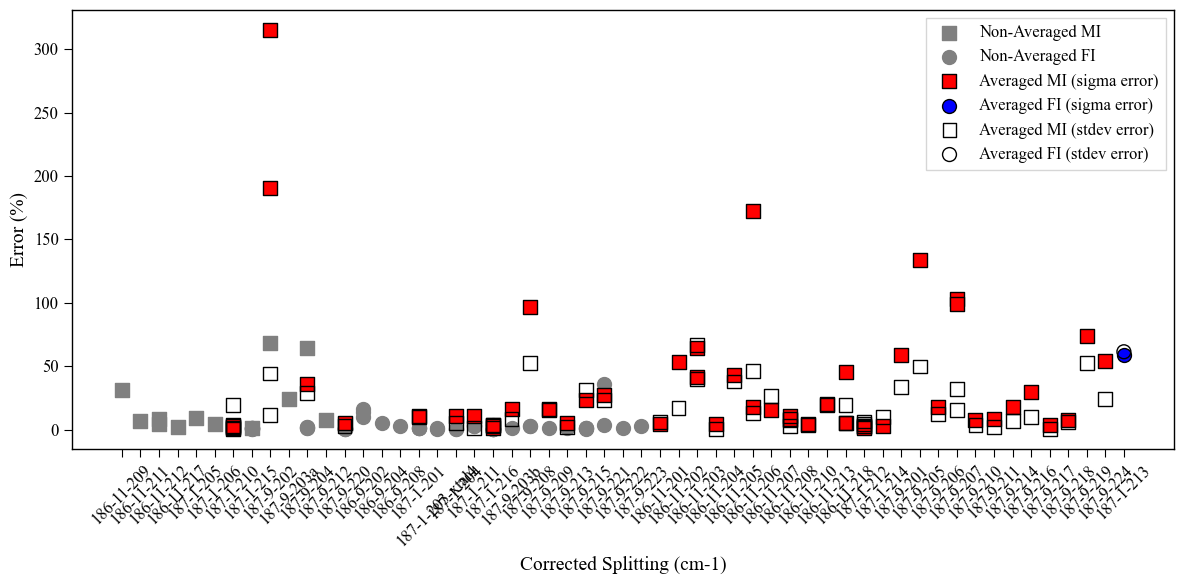

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the error threshold
error_threshold = 30  # Set your threshold percentage here

# Filter the DataFrame to include only rows where 'averaged?' is 'Yes'
kamaehu_filtered = kamaehu_averaged[kamaehu_averaged['averaged?'] == 'Yes'].copy()

# Calculate percentage error
kamaehu_filtered['Error (%)'] = (kamaehu_filtered['σ Density g/cm3'] / kamaehu_filtered['Density g/cm3']) * 100

# Calculate percentage error using 'Density g/cm3_std'
kamaehu_filtered['Error (std) (%)'] = (kamaehu_filtered['Density g/cm3_std'] / kamaehu_filtered['Density g/cm3']) * 100

# Filter the DataFrame to include only rows where 'averaged?' is 'No'
kamaehu_non_averaged = kamaehu_averaged[kamaehu_averaged['averaged?'] == 'No'].copy()

# Calculate percentage error for non-averaged data
kamaehu_non_averaged['Error (%)'] = (kamaehu_non_averaged['σ Density g/cm3'] / kamaehu_non_averaged['Density g/cm3']) * 100

# Create a figure and axis with a specified size
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figsize to make the plot longer

# Boolean masks for different sample types
MI = kamaehu_filtered['filename'].str.contains("MI")
FI = kamaehu_filtered['filename'].str.contains("FI")

# Boolean masks for non-averaged data
MI_non_averaged = kamaehu_non_averaged['filename'].str.contains("MI")
FI_non_averaged = kamaehu_non_averaged['filename'].str.contains("FI")

# Plot MI data with Error (%)

# Plot non-averaged MI data with Error (%) using grey circles
if not kamaehu_non_averaged[MI_non_averaged].empty:
    ax.scatter(kamaehu_non_averaged[MI_non_averaged]['Sample-Crystal'],
               kamaehu_non_averaged[MI_non_averaged]['Error (%)'],
               color='grey', marker='s', s=100, 
               label='Non-Averaged MI')

# Plot non-averaged FI data with Error (%) using grey squares
if not kamaehu_non_averaged[FI_non_averaged].empty:
    ax.scatter(kamaehu_non_averaged[FI_non_averaged]['Sample-Crystal'],
               kamaehu_non_averaged[FI_non_averaged]['Error (%)'],
               color='grey', marker='o', s=100, 
               label='Non-Averaged FI')
    
if not kamaehu_filtered[MI].empty:
    ax.scatter(kamaehu_filtered[MI]['Sample-Crystal'],
               kamaehu_filtered[MI]['Error (%)'],
               color='red', marker='s', s=100, 
               label='Averaged MI (sigma error)', edgecolor='k')

# Plot FI data with Error (%)
if not kamaehu_filtered[FI].empty:
    ax.scatter(kamaehu_filtered[FI]['Sample-Crystal'],
               kamaehu_filtered[FI]['Error (%)'],
               color='blue', marker='o', s=100, 
               label='Averaged FI (sigma error)', edgecolor='k')

# Plot MI data with Error (std) (%) using empty markers
if not kamaehu_filtered[MI].empty:
    ax.scatter(kamaehu_filtered[MI]['Sample-Crystal'],
               kamaehu_filtered[MI]['Error (std) (%)'],
               color='red', marker='s', s=100, facecolors='none', 
               label='Averaged MI (stdev error)', edgecolor='k')

# Plot FI data with Error (std) (%) using empty markers
if not kamaehu_filtered[FI].empty:
    ax.scatter(kamaehu_filtered[FI]['Sample-Crystal'],
               kamaehu_filtered[FI]['Error (std) (%)'],
               color='blue', marker='o', s=100, facecolors='none', 
               label='Averaged FI (stdev error)', edgecolor='k')



# Set labels and title
ax.set_xlabel("Corrected Splitting (cm-1)")
ax.set_ylabel("Error (%)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend if any data was plotted
if ax.get_legend_handles_labels()[0]:  # Check if any labels were added
    ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [33]:
kamaehu_averaged.to_excel(compilation_folder+'/'+"Kamae'huakanaloa_averaged.xlsx")


In [34]:
kamaehu_averaged[kamaehu_averaged['FI_name'].str.contains("9-202")][['FI_name','Error (%)','Error (std) (%)']]

,FI_name,Error (%),Error (std) (%)
20,186-9-202-FIA,10.203971,NaN
21,186-9-202-FIB,13.548687,NaN
22,186-9-202-FIC,16.081884,NaN
67,187-9-202-MIB,315.325928,11.622379
68,187-9-202-MIC,68.406036,NaN
69,187-9-202-MID,190.898519,44.246237
